In [3]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress user warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


Loading the data

In [4]:
df = pd.read_csv('adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                                     'marital-status', 'occupation', 'relationship', "race","sex","capital-gain","capital-loss",
                                                     "hours-per-week","native-country","income"])



In [5]:
print("Initial data shape:", df.shape)

Initial data shape: (32561, 15)


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
print(df.isin([' ?']).sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [11]:
# checking ? counts
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)
print("Data shape after removing missing values:", df.shape)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Data shape after removing missing values: (32561, 15)


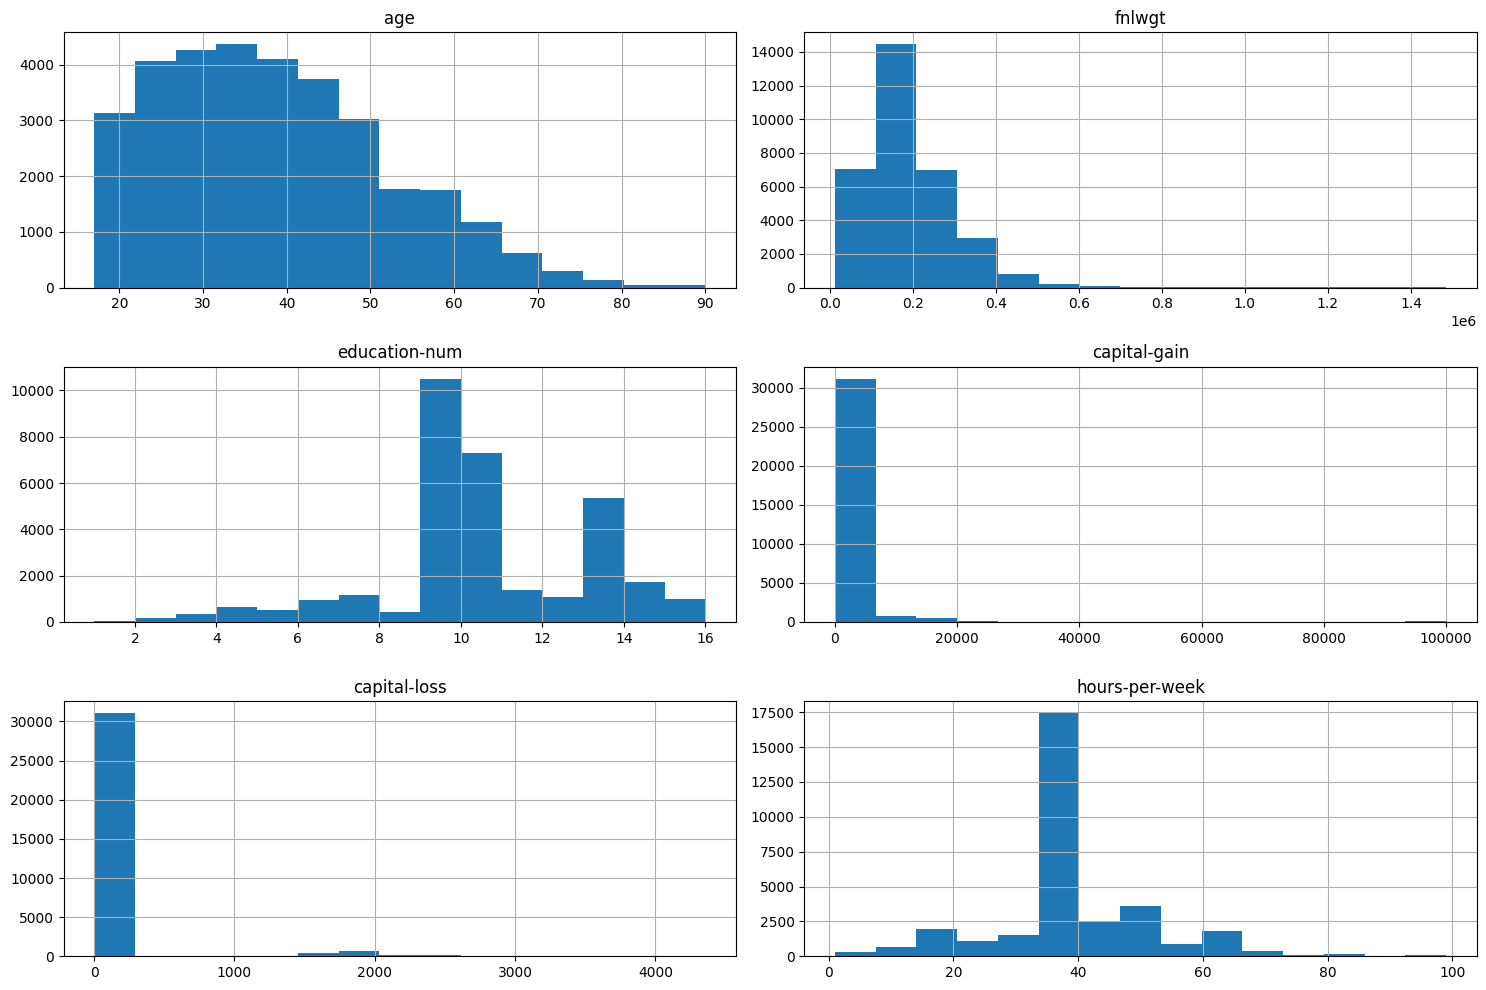

In [12]:
#distribution of numeric features
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

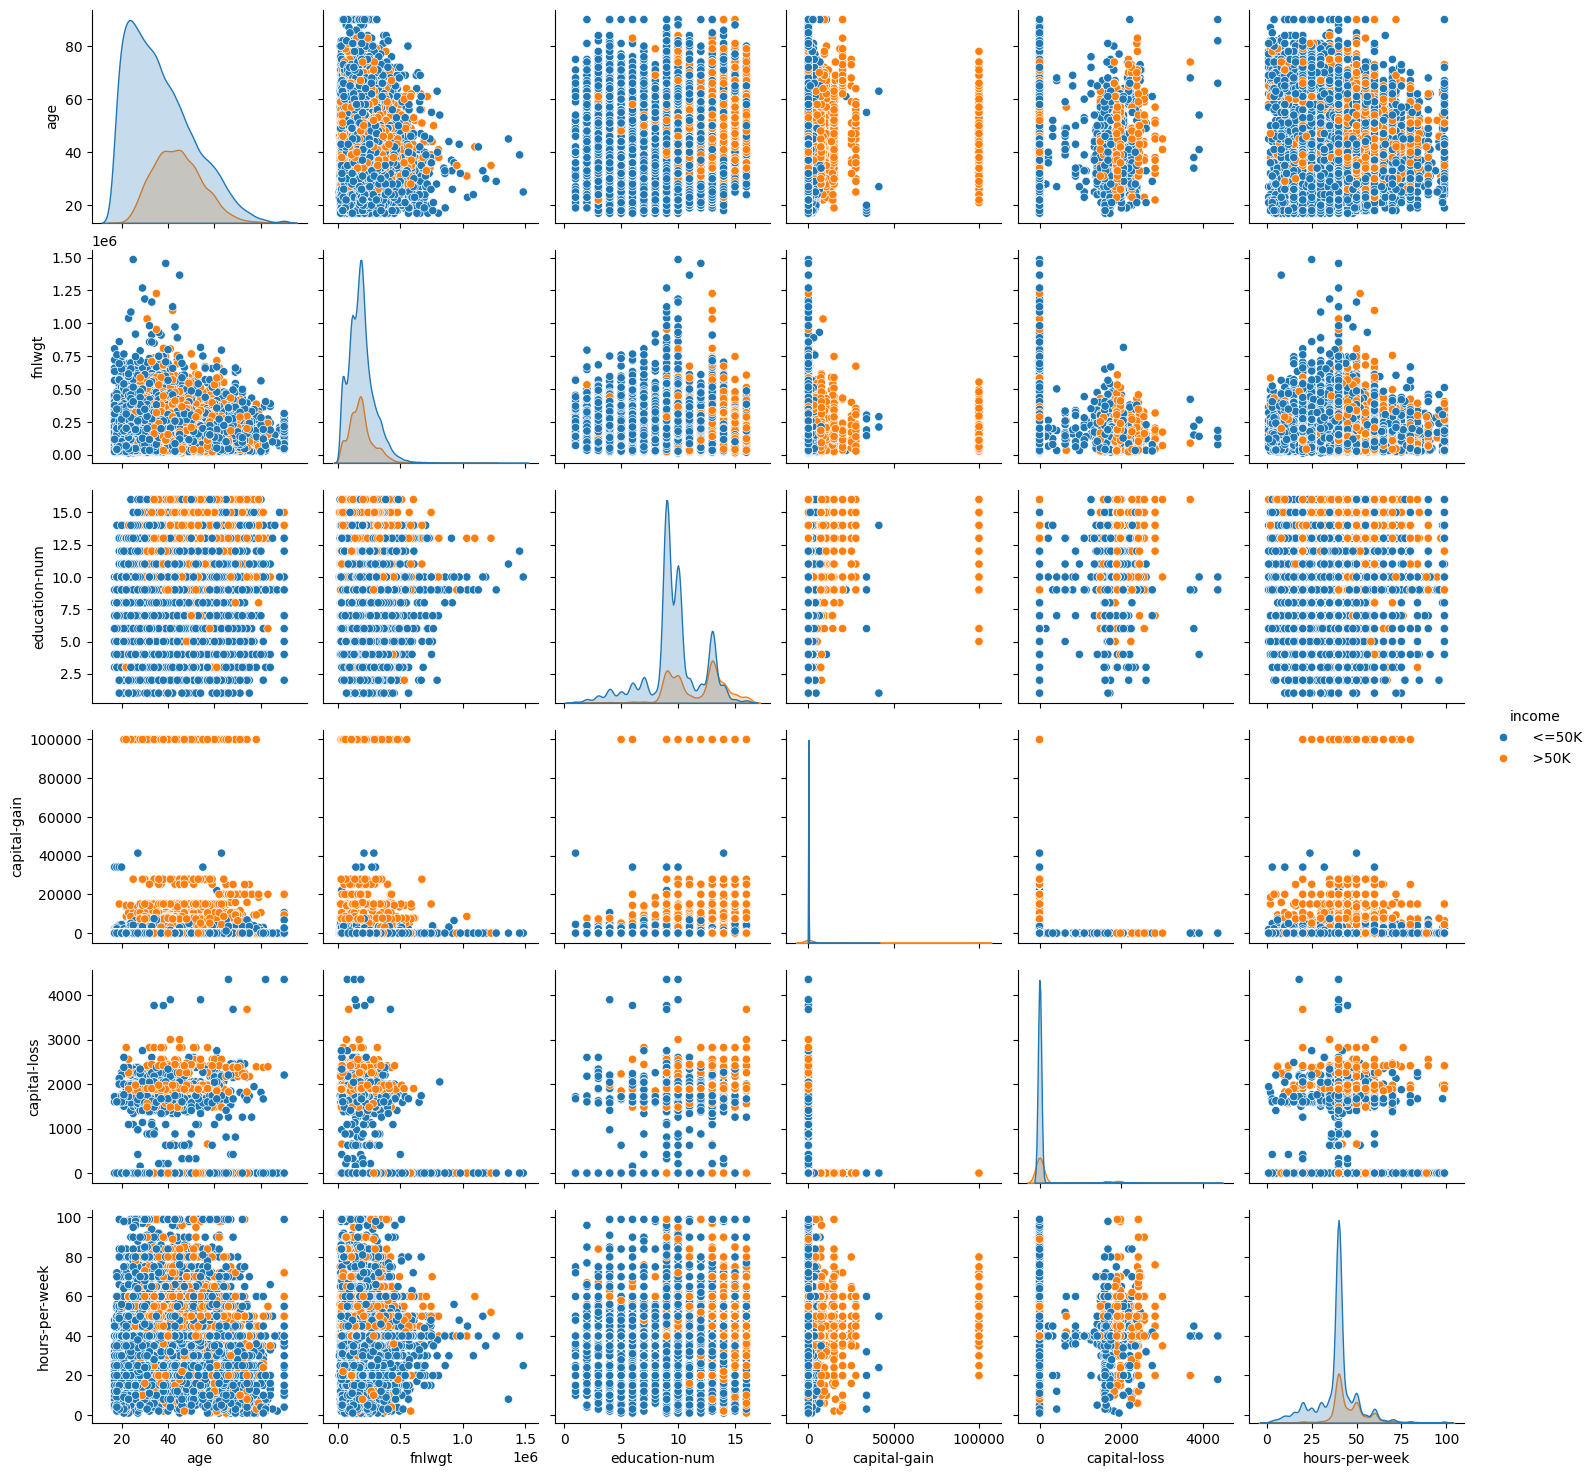

In [13]:
#pairplot
sns.pairplot(df, hue='income')
plt.show()


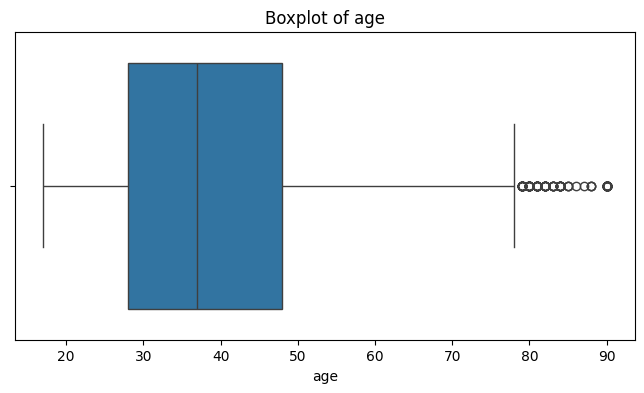

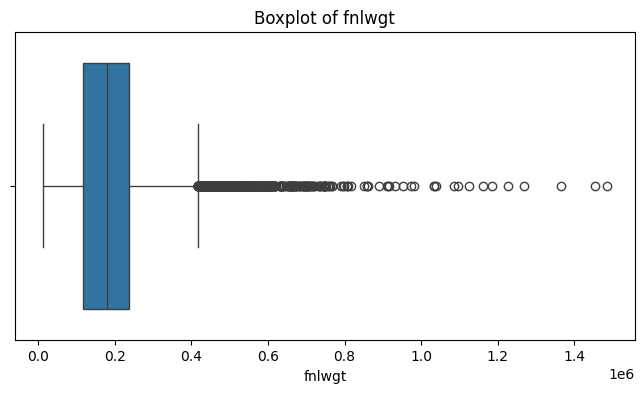

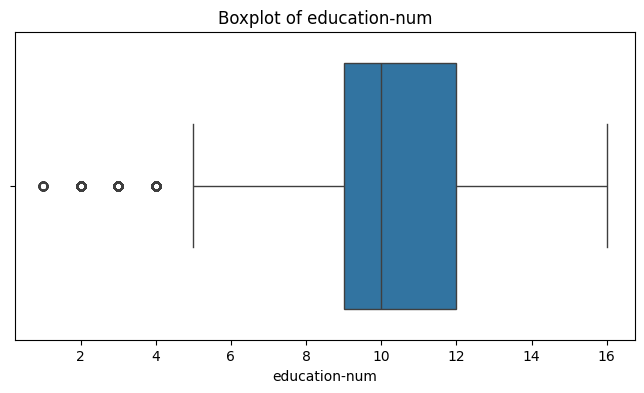

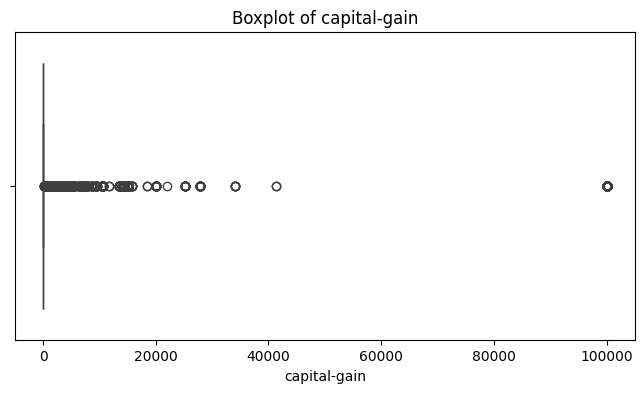

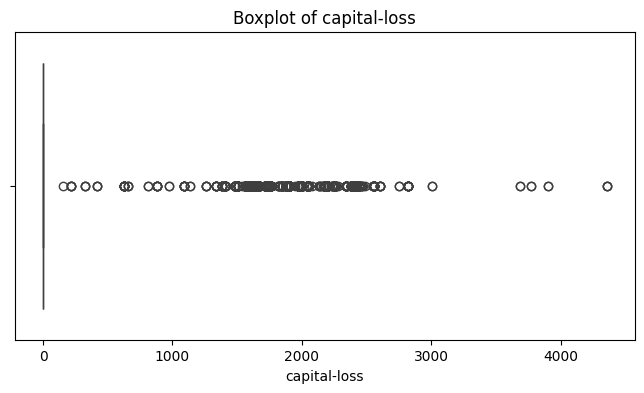

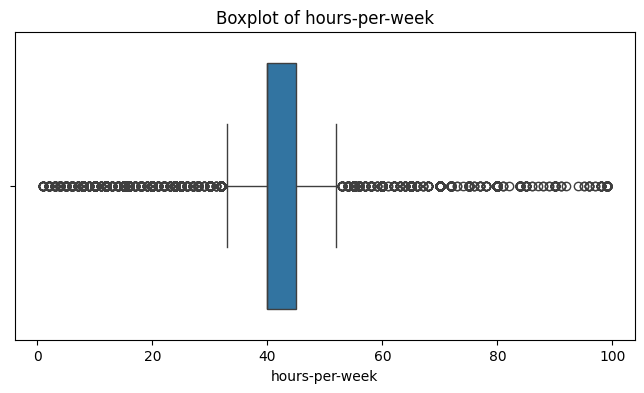

In [14]:
#boxplot for outliers
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

In [15]:
#numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()    
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [157]:
# Replace "?" with "Unknown" in categorical columns
categorical_features = ['workclass', 'occupation', 'native-country']

for col in categorical_features:
    df[col] = df[col].replace(' ?', 'Unknown')  # Notice the leading space in ' ?'

# Verify replacements
print(df.isin([' ?']).sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


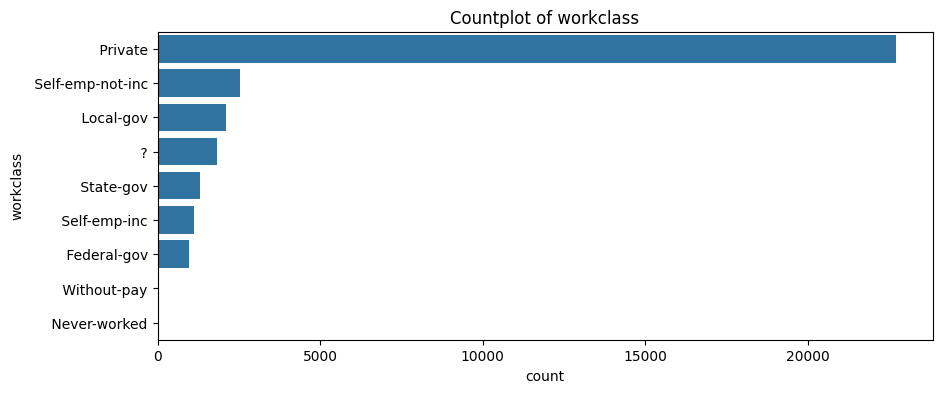

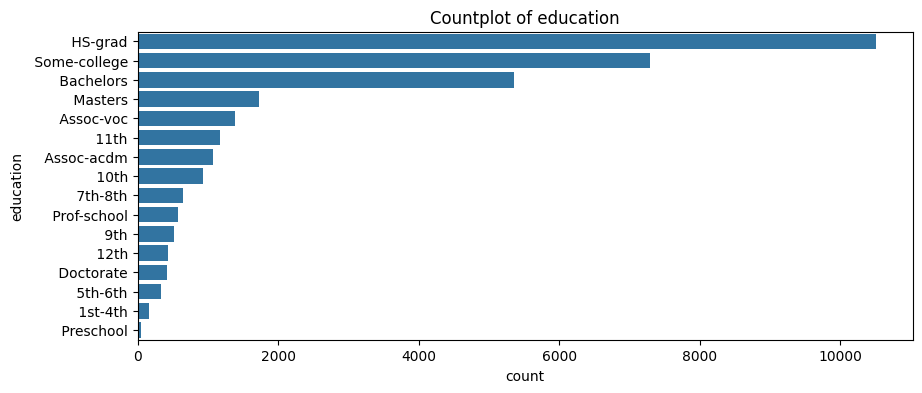

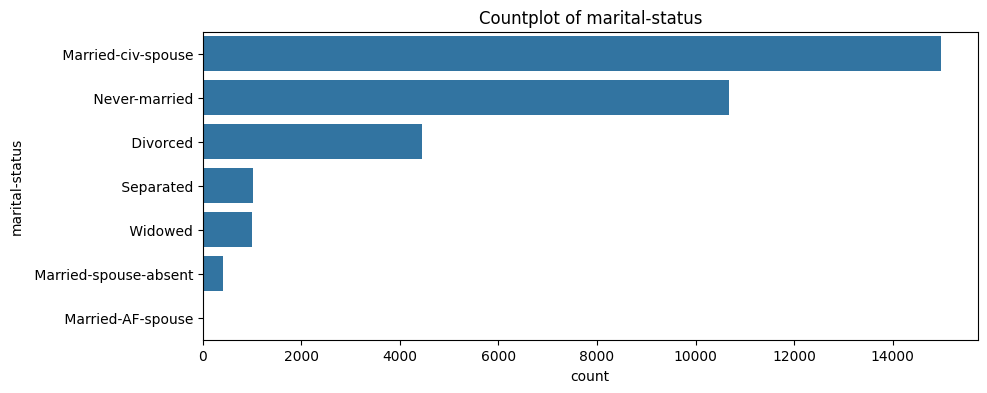

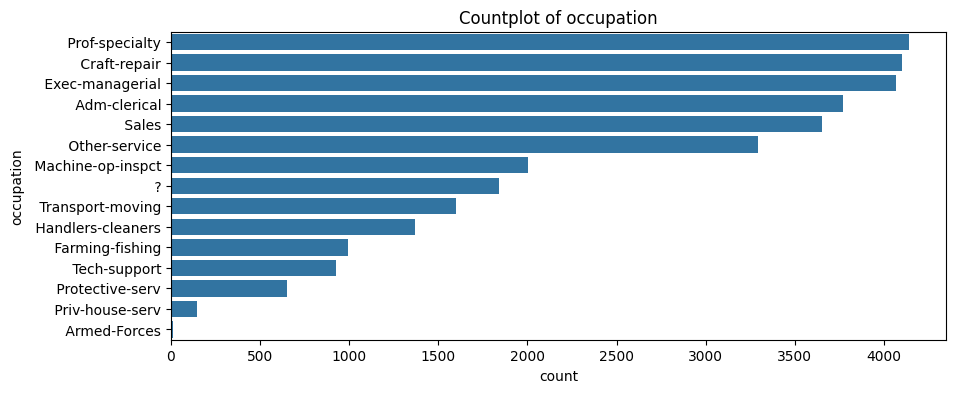

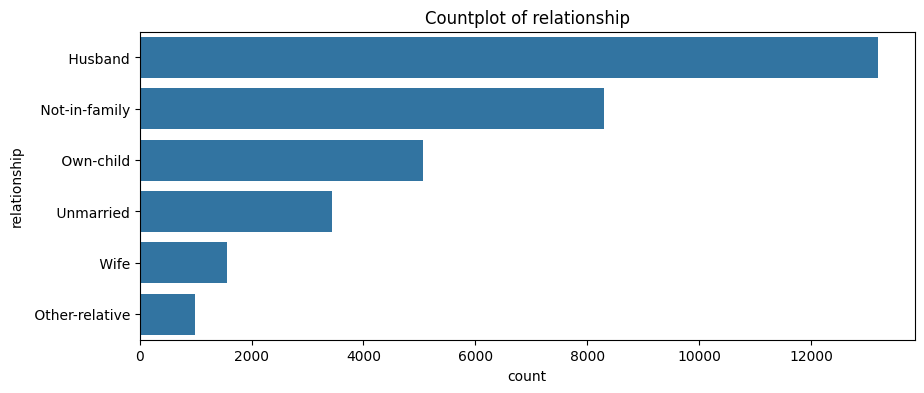

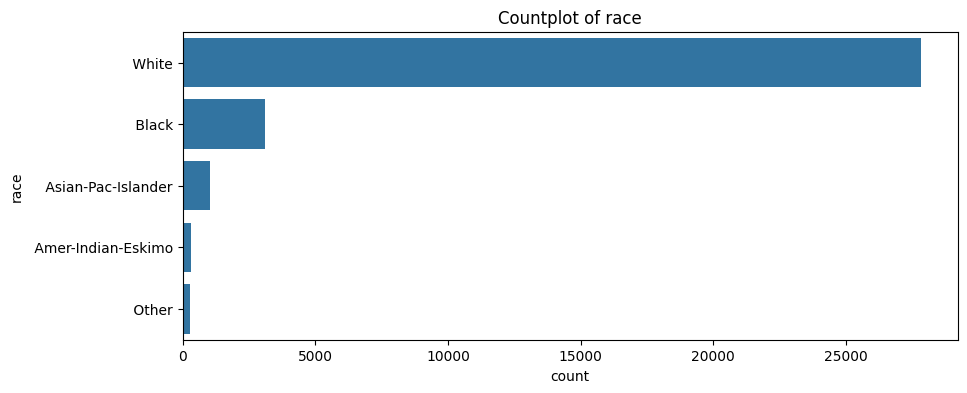

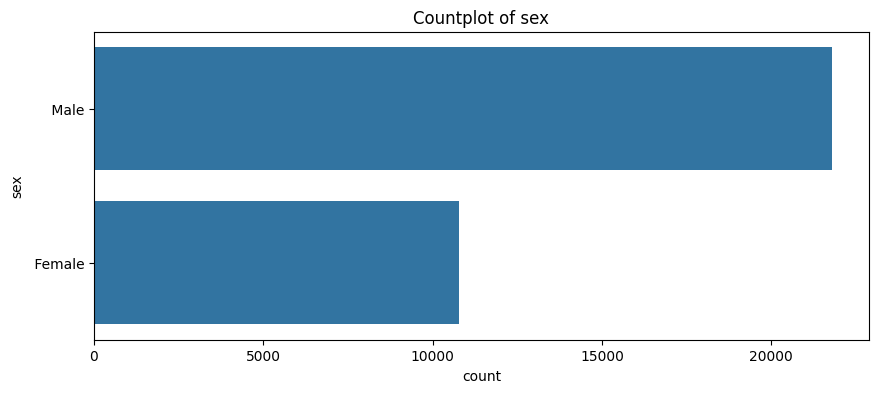

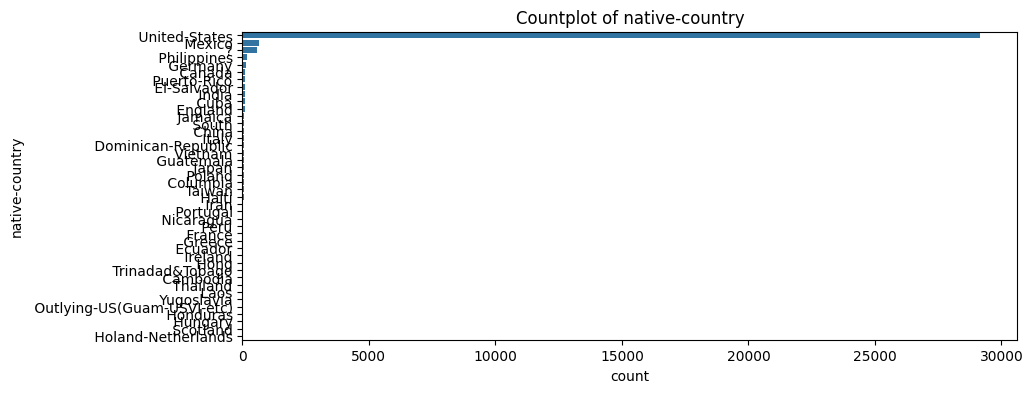

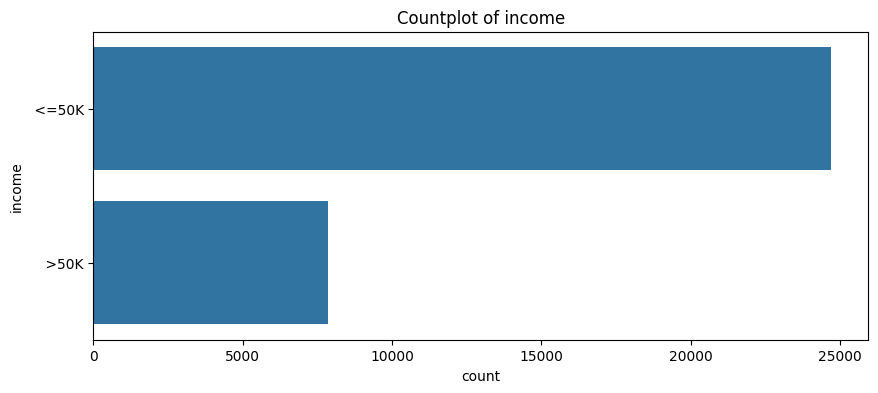

In [158]:
import seaborn as sns
#distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

In [17]:
# Replace "?" with "Unknown" in categorical columns
categorical_features = ['workclass', 'occupation', 'native-country']

for col in categorical_features:
    df[col] = df[col].replace(' ?', 'Unknown')  # Notice the leading space in ' ?'

# Verify replacements
print(df.isin([' ?']).sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


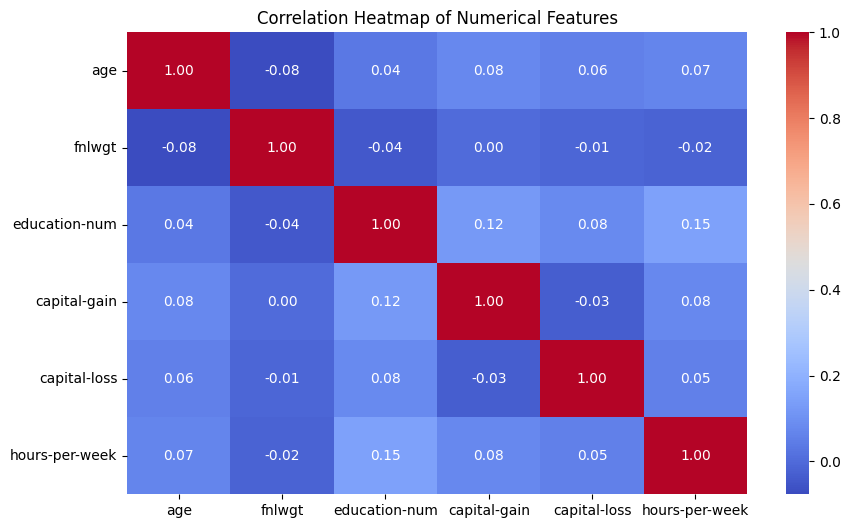

In [18]:
#correlation heatmap

plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_features].corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Handle outliers for numeric features
def handle_outliers(df, cols, method="iqr", log_transform=False):
    df = df.copy()
    for col in cols:
        if log_transform and col in ["capital-gain", "capital-loss"]:
            # Apply log1p to reduce skewness 
            df[col] = np.log1p(df[col])
        else:
            if method == "iqr":
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                # Cutting values outside bounds
                df[col] = np.clip(df[col], lower, upper)
            elif method == "percentile":
                lower = df[col].quantile(0.01)
                upper = df[col].quantile(0.99)
                df[col] = np.clip(df[col], lower, upper)
    return df

# Apply outlier handling
numeric_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
df = handle_outliers(df, numeric_cols, method="iqr", log_transform=True)

# Quick check after transformation
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.555603,13.556130,17.0,28.0,37.0,48.0,78.000000
fnlwgt,32561.0,186829.079236,95129.625135,12285.0,117827.0,178356.0,237051.0,415887.000000
education-num,32561.0,10.124321,2.459770,4.5,9.0,10.0,12.0,16.000000
capital-gain,32561.0,0.734621,2.454738,0.0,0.0,0.0,0.0,11.512925
capital-loss,32561.0,0.350305,1.584581,0.0,0.0,0.0,0.0,8.379539
hours-per-week,32561.0,41.202451,6.187005,32.5,40.0,40.0,45.0,52.500000


In [20]:
print(df.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 3.7+ MB


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dropping the redundant education column 
df.drop(columns=['education'], inplace=True)

# Separate out categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode the target column
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# One-hot encode the remaining categorical columns
categorical_cols = [col for col in categorical_cols if col != 'income']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check result 
print("Data types after encoding:\n", df.dtypes.value_counts())
print("Shape after encoding:", df.shape)


Data types after encoding:
 bool       79
float64     4
int64       3
Name: count, dtype: int64
Shape after encoding: (32561, 86)


In [23]:
#defining X and y
X = df.drop('income', axis=1)
y = df['income']

In [24]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (26048, 85)
Test shape: (6513, 85)


In [167]:
print("Before SMOTE, training target distribution:")
print(y_train.value_counts())

Before SMOTE, training target distribution:
income
0    19775
1     6273
Name: count, dtype: int64


In [25]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Impute missing values 
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Confirm no missing values remain
print("Missing values after imputation:", X_imputed.isnull().sum().sum())

# SMOTE to handle class imbalance
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_resampled, y_resampled = sm.fit_resample(X_imputed, y)

# Show results
print("Before resampling:", X.shape, y.shape)
print("After resampling:", X_resampled.shape, y_resampled.shape)
print("Class distribution after:\n", pd.Series(y_resampled).value_counts())


Missing values after imputation: 0
Before resampling: (32561, 85) (32561,)
After resampling: (49440, 85) (49440,)
Class distribution after:
 income
0    24720
1    24720
Name: count, dtype: int64


In [173]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Custom transformer to convert arrays back to DataFrame
class ToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X)


In [ ]:
import pandas as pd
import numpy as np
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
import lightgbm as lgb

# Custom transformer: converts numpy arrays back to DataFrames (needed after imputer)
from sklearn.base import BaseEstimator, TransformerMixin

class ToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.columns_ = X.columns if isinstance(X, pd.DataFrame) else [f"f{i}" for i in range(X.shape[1])]
        return self
    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns_)

# ✅ DYNAMIC COLUMN DETECTION (FIXED)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if present
if 'income' in numerical_features:
    numerical_features.remove('income')
if 'income' in categorical_features:
    categorical_features.remove('income')

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

# Create preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])

# Define pipelines with proper preprocessing
pipelines = {
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', xgb.XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42,
            n_jobs=-1
        ))
    ]),
    
    'LightGBM': Pipeline([
        ('preprocessor', preprocessor),
        ('lgbm', lgb.LGBMClassifier(random_state=42))
    ])
}

Categorical features: []
Numerical features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [185]:
print("Model expects this many features:", X_train.shape[1])
print("Feature names used for training:", list(X_train.columns))


Model expects this many features: 85
Feature names used for training: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_Unknown', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'occupation_Unknown', 'relationship_ Not-in-family',

In [ ]:
#  Training and evaluation
# Save the encoded feature names
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

results = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    
    # Train 
    pipeline.fit(X_train, y_train)
    
    # Predict 
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Evaluate 
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    cm = confusion_matrix(y_test, y_test_pred)
    cr = classification_report(y_test, y_test_pred, output_dict=True)

    # Print 
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", pd.DataFrame(cr).T)

    # Save metrics 
    results[name] = {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "confusion_matrix": cm,
        "classification_report": cr
    }

    # Save the trained pipeline 
    joblib.dump(pipeline, f"{name.lower()}_pipeline.pkl")

#  Save all results for later analysis
joblib.dump(results, "model_results.pkl")

print("\n All models trained and saved successfully!")






Training LogisticRegression...
LogisticRegression - Train Accuracy: 0.8083, Test Accuracy: 0.8127

Confusion Matrix:
 [[4630  315]
 [ 905  663]]

Classification Report:
               precision    recall  f1-score      support
0              0.836495  0.936299  0.883588  4945.000000
1              0.677914  0.422832  0.520817  1568.000000
accuracy       0.812682  0.812682  0.812682     0.812682
macro avg      0.757205  0.679565  0.702202  6513.000000
weighted avg   0.798317  0.812682  0.796251  6513.000000

Training RandomForest...
RandomForest - Train Accuracy: 0.9975, Test Accuracy: 0.8025

Confusion Matrix:
 [[4428  517]
 [ 769  799]]

Classification Report:
               precision    recall  f1-score      support
0              0.852030  0.895450  0.873201  4945.000000
1              0.607143  0.509566  0.554092  1568.000000
accuracy       0.802549  0.802549  0.802549     0.802549
macro avg      0.729586  0.702508  0.713646  6513.000000
weighted avg   0.793074  0.802549  0.796375

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid
rf_param_grid = {
    "n_estimators": [200, 300, 500, 800],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

# Base model
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Random search with 5-fold cross validation
rf_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_param_grid,
    n_iter=30,
    scoring="f1",   
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_

print("Best RandomForest params:\n", rf_search.best_params_)

# Evaluate
y_pred = best_rf.predict(X_test)
print("RandomForest - Train Accuracy:", accuracy_score(y_train, best_rf.predict(X_train)))
print("RandomForest - Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RandomForest params:
 {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
RandomForest - Train Accuracy: 0.8575706388206388
RandomForest - Test Accuracy: 0.8284968524489482
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      4945
           1       0.60      0.86      0.71      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.84      0.79      6513
weighted avg       0.86      0.83      0.84      6513



In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint, uniform

# Define parameter distributions for random search
xgb_param_dist = {
    'n_estimators': randint(200, 600),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'scale_pos_weight': [1, 2, 5]  
}

# Initialize base XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Random search with 5-fold cross-validation
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=30,                
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on resampled training data
xgb_random.fit(X_resampled, y_resampled)

# Best model
best_xgb = xgb_random.best_estimator_
print("Best XGBoost params:\n", xgb_random.best_params_)

# Evaluate performance
y_train_pred = best_xgb.predict(X_resampled)
y_test_pred = best_xgb.predict(X_test)

print("XGBoost - Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("XGBoost - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost params:
 {'colsample_bytree': np.float64(0.8337498258560773), 'learning_rate': np.float64(0.039992474745400866), 'max_depth': 5, 'n_estimators': 287, 'scale_pos_weight': 1, 'subsample': np.float64(0.8803345035229626)}
XGBoost - Train Accuracy: 0.9159587378640777
XGBoost - Test Accuracy: 0.87947182557961
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4945
           1       0.77      0.71      0.74      1568

    accuracy                           0.88      6513
   macro avg       0.84      0.82      0.83      6513
weighted avg       0.88      0.88      0.88      6513



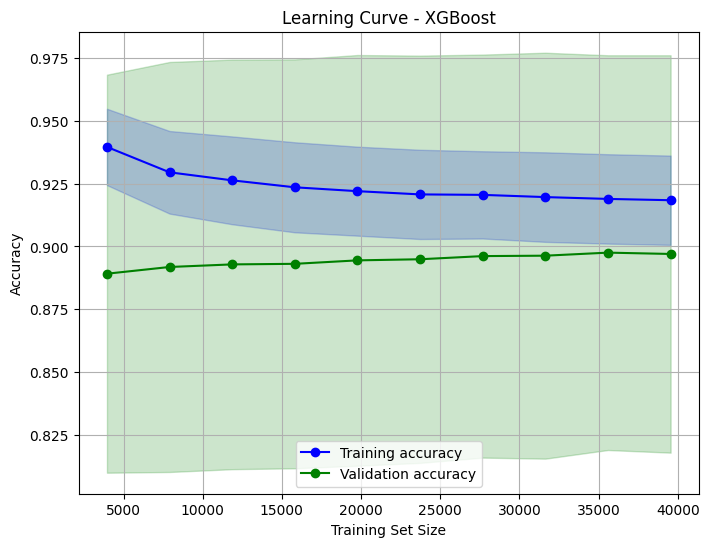

In [61]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best tuned XGBoost model from before
xgb_model = best_xgb

# Generate learning curve values
train_sizes, train_scores, val_scores = learning_curve(
    estimator=xgb_model,
    X=X_resampled, 
    y=y_resampled,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')

plt.title('Learning Curve - XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


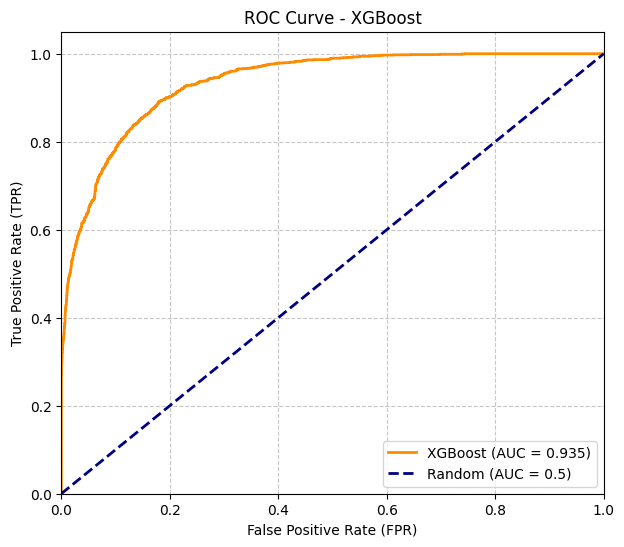

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_probs = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


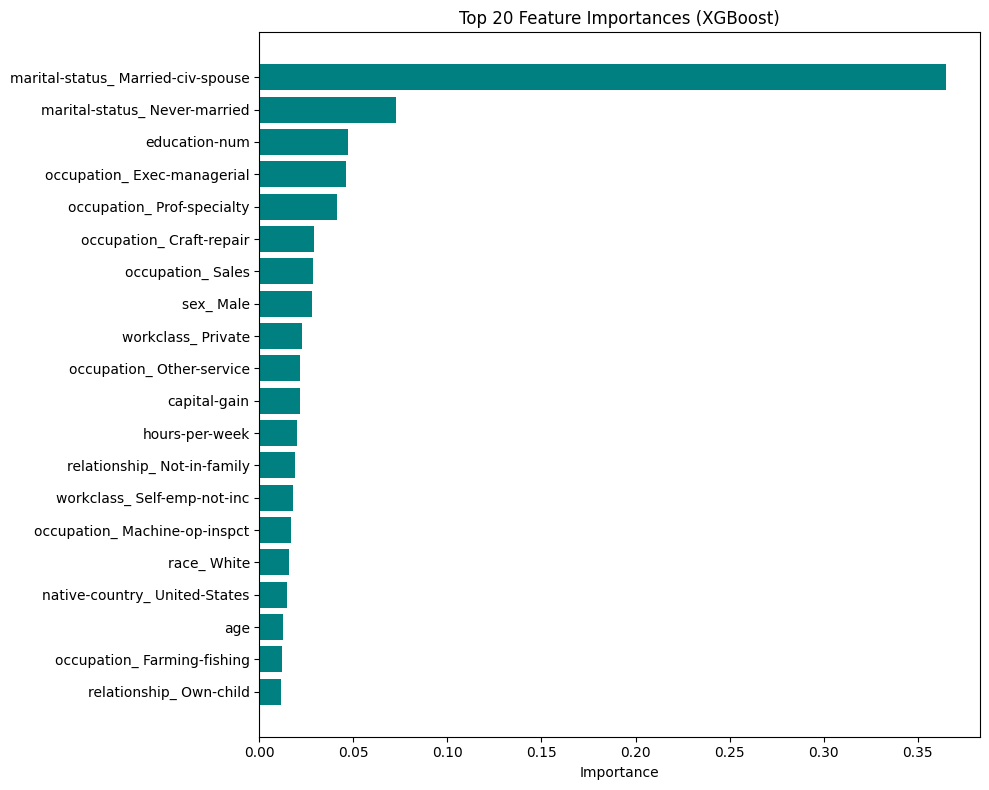

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance


# Get feature importance scores as a dictionary
importances = best_xgb.feature_importances_

# Create DataFrame to sort values
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 8))
plt.barh(feat_importances['feature'][:20][::-1],
         feat_importances['importance'][:20][::-1],
         color='teal')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()



In [64]:
import numpy as np
import pandas as pd

# True and predicted labels from your test set
y_true = y_test
y_pred = y_test_pred

# Indices of false positives: predicted 1 but actually 0
fp_idx = np.where((y_true == 0) & (y_pred == 1))[0]

# Get the corresponding feature rows
false_positives = X_test.iloc[fp_idx].copy()
false_positives['true'] = y_true.iloc[fp_idx]
false_positives['pred'] = y_pred[fp_idx]

false_positives.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown,true,pred
5394,43,52849,13.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,True,False,False,False,0,1
3818,40,181265,10.0,0.0,0.0,52.0,False,False,True,False,...,False,False,False,False,True,False,False,False,0,1
23194,37,160910,16.0,0.0,0.0,45.0,False,False,False,False,...,False,False,False,False,True,False,False,False,0,1
29227,40,141858,15.0,0.0,0.0,52.5,False,False,False,False,...,False,False,False,False,True,False,False,False,0,1
16439,35,186126,14.0,0.0,0.0,38.0,False,False,True,False,...,False,False,False,False,False,False,False,True,0,1


In [65]:
import numpy as np

# Find all indices where prediction != truth
misclassified_idx = np.where(y_true != y_pred)[0]

# Count them
total_misclassified = len(misclassified_idx)
print(f"Total misclassified points: {total_misclassified}")

misclassified = X_test.iloc[misclassified_idx].copy()
misclassified['true'] = y_true.iloc[misclassified_idx].values
misclassified['pred'] = y_pred[misclassified_idx]
misclassified.head()


Total misclassified points: 785


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown,true,pred
22937,39,380614,10.0,0.0,0.000000,45.0,False,False,True,False,...,False,False,False,False,True,False,False,False,1,0
26182,44,29591,13.0,0.0,7.722678,40.0,False,False,False,False,...,False,False,False,False,True,False,False,False,1,0
5394,43,52849,13.0,0.0,0.000000,40.0,False,False,False,False,...,False,False,False,False,True,False,False,False,0,1
29407,47,415887,9.0,0.0,0.000000,40.0,False,False,True,False,...,False,False,False,False,True,False,False,False,1,0
3818,40,181265,10.0,0.0,0.000000,52.0,False,False,True,False,...,False,False,False,False,True,False,False,False,0,1


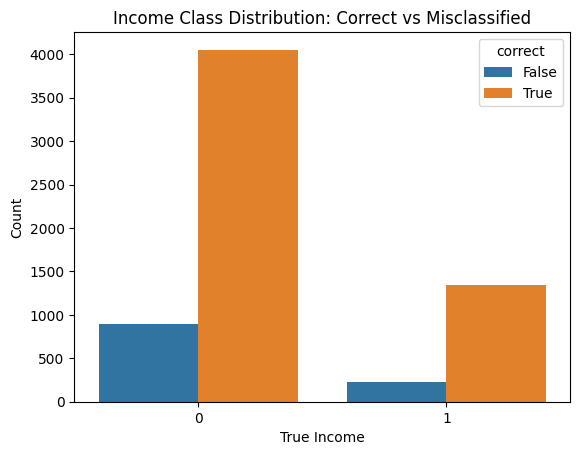

In [62]:
results_df = X_test.copy()
results_df['true'] = y_test
results_df['pred'] = y_pred
results_df['correct'] = results_df['true'] == results_df['pred']

sns.countplot(data=results_df, x='true', hue='correct')
plt.title("Income Class Distribution: Correct vs Misclassified")
plt.xlabel("True Income")
plt.ylabel("Count")
plt.show()


In [63]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

# Train xgboost model on the scaled data
best_xgb.fit(X_train_scaled, y_train)

# Save both model and scaler
joblib.dump(best_xgb, "xgb_model.pkl")
# joblib.dump(pipeline, "best_pipeline.pkl")
joblib.dump(scaler, "scaler.pkl")





['scaler.pkl']